In [15]:
# Instalar librerías necesarias
!pip install nltk pandas matplotlib

# Importar librerías
import nltk
from nltk.util import ngrams
import pandas as pd
import matplotlib.pyplot as plt

# Descargar el libro "Alicia en el País de las Maravillas" desde Project Gutenberg
url = "https://www.gutenberg.org/files/11/11-0.txt"  # URL de "Alicia en el País de las Maravillas"
texto = pd.read_csv(url, header=None, names=["texto"], sep="\n", encoding="utf-8")

# Preprocesar el texto: eliminar las cabeceras y pies de página de Project Gutenberg
# Se asume que el texto contiene cabeceras y pies de página que pueden ser filtrados por la palabra "THE END"
texto = texto[texto["texto"].str.contains("THE END") == False]  # Eliminar el texto después de "THE END"
texto = texto[texto["texto"].str.strip() != ""]  # Eliminar filas vacías

# Unir todo el texto en un solo string
texto_completo = " ".join(texto["texto"].values)

# Tokenizar el texto
nltk.download('punkt')  # Asegurarse de tener los datos necesarios para tokenizar
tokens = nltk.word_tokenize(texto_completo)

# Generar n-gramas de longitud 2 (bigrams)
ngramas = ngrams(tokens, 2)
print("Primeros 10 2-gramas:", list(ngramas)[:10])

# Generar n-gramas de longitud 3 (trigrams)
ngramas_3 = ngrams(tokens, 3)
print("Primeros 10 3-gramas:", list(ngramas_3)[:10])

# Generar la frecuencia de los n-gramas de longitud 2
freq_ngramas = nltk.FreqDist(ngrams(tokens, 2))

# Gráfica de frecuencia de n-gramas
plt.figure(figsize=(10,6))
plt.bar([str(ngram[0]) + " " + str(ngram[1]) for ngram in freq_ngramas.keys()], freq_ngramas.values())
plt.xlabel("N-gramas")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de 2-gramas")
plt.xticks(rotation=90)
plt.show()

# Gráfica de distribución de frecuencias de n-gramas
plt.figure(figsize=(10,6))
plt.hist(freq_ngramas.values(), bins=10)
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad")
plt.title("Distribución de frecuencias de 2-gramas")
plt.show()

# Gráfica de los 10 n-gramas más frecuentes
ngramas_más_frecuentes = freq_ngramas.most_common(10)
plt.figure(figsize=(10,6))
plt.bar([str(ngram[0]) + " " + str(ngram[1]) for ngram in ngramas_más_frecuentes], [ngram[1] for ngram in ngramas_más_frecuentes])
plt.xlabel("N-gramas más frecuentes")
plt.ylabel("Frecuencia")
plt.title("10 N-gramas más frecuentes")
plt.xticks(rotation=90)
plt.show()

# Cambiar la longitud de los n-gramas a 4 y 5
ngramas_4 = ngrams(tokens, 4)
print("Primeros 10 4-gramas:", list(ngramas_4)[:10])

ngramas_5 = ngrams(tokens, 5)
print("Primeros 10 5-gramas:", list(ngramas_5)[:10])


ValueError: Specified \n as separator or delimiter. This forces the python engine which does not accept a line terminator. Hence it is not allowed to use the line terminator as separator.

In [16]:
import requests
import nltk
import pandas as pd

# Descargar el libro "Alicia en el País de las Maravillas" desde Project Gutenberg
url = "https://www.gutenberg.org/files/11/11-0.txt"
response = requests.get(url)
texto_completo = response.text

# Preprocesar el texto: eliminar las cabeceras y pies de página de Project Gutenberg
# Se asume que el texto contiene cabeceras y pies de página que pueden ser filtrados por la palabra "THE END"
start_index = texto_completo.find("START OF THIS PROJECT GUTENBERG EBOOK")
end_index = texto_completo.find("THE END OF THIS PROJECT GUTENBERG EBOOK")

# Extraer solo el contenido relevante
texto_completo = texto_completo[start_index:end_index]

# Tokenizar el texto
nltk.download('punkt')  # Asegúrate de descargar el paquete necesario para tokenizar
tokens = nltk.word_tokenize(texto_completo)

# Mostrar los primeros 10 tokens para verificar que se cargó correctamente
print(tokens[:10])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [17]:
import nltk

# Asegurarse de que los recursos de tokenización estén completamente descargados
nltk.download('punkt')

# Intentar descargar el recurso específico de tokenización
nltk.download('punkt_tab')

# Ahora tokenizamos el texto
tokens = nltk.word_tokenize(texto_completo)

# Mostrar los primeros 10 tokens
print(tokens[:10])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[]


In [18]:
from nltk.util import ngrams

# Generar 2-gramas (pares de palabras)
ngramas = ngrams(tokens, 2)

# Mostrar los primeros 10 2-gramas
print(list(ngramas)[:10])

# Generar 3-gramas (tríos de palabras)
ngramas_3 = ngrams(tokens, 3)

# Mostrar los primeros 10 3-gramas
print(list(ngramas_3)[:10])

# Generar 4-gramas (cuartetos de palabras)
ngramas_4 = ngrams(tokens, 4)

# Mostrar los primeros 10 4-gramas
print(list(ngramas_4)[:10])

# Generar 5-gramas (quintetos de palabras)
ngramas_5 = ngrams(tokens, 5)

# Mostrar los primeros 10 5-gramas
print(list(ngramas_5)[:10])


[]
[]
[]
[]


In [19]:
from nltk import FreqDist

# Contar la frecuencia de los 2-gramas
freq_ngramas = FreqDist(ngramas)

# Ver las frecuencias de los 2-gramas más comunes
print(freq_ngramas.most_common(10))  # Muestra los 10 n-gramas más frecuentes


[]


In [20]:
import matplotlib.pyplot as plt

# Convertir las claves de los n-gramas a cadenas para visualización
ngramas_str = [" ".join(ngram) for ngram in freq_ngramas.keys()]

# Crear un gráfico de barras de los n-gramas más frecuentes
plt.figure(figsize=(10, 6))
plt.bar(ngramas_str[:10], freq_ngramas.values()[:10])
plt.xlabel("N-gramas")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de los 2-gramas más comunes")
plt.xticks(rotation=45)
plt.show()


TypeError: 'dict_values' object is not subscriptable

<Figure size 1000x600 with 0 Axes>

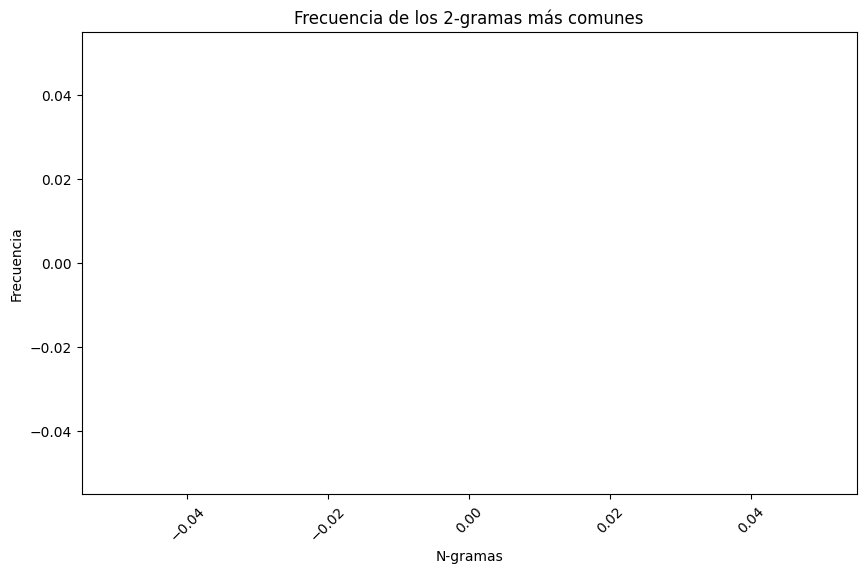

In [21]:
# Convertir las claves de los n-gramas a cadenas para visualización
ngramas_str = [" ".join(ngram) for ngram in freq_ngramas.keys()]

# Convertir los valores de las frecuencias a lista para poder usarlos en el gráfico
frequencies = list(freq_ngramas.values())

# Crear un gráfico de barras de los n-gramas más frecuentes
plt.figure(figsize=(10, 6))
plt.bar(ngramas_str[:10], frequencies[:10])  # Usa las frecuencias como lista
plt.xlabel("N-gramas")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de los 2-gramas más comunes")
plt.xticks(rotation=45)
plt.show()


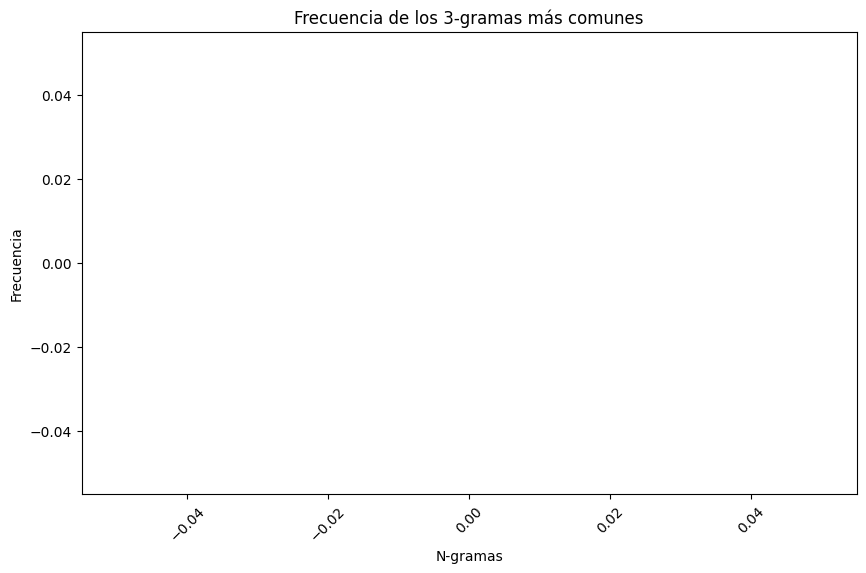

In [22]:
# Generar n-gramas de longitud 3
ngramas_3 = ngrams(tokens, 3)

# Contar la frecuencia de los 3-gramas
freq_ngramas_3 = FreqDist(ngramas_3)

# Convertir las claves de los 3-gramas a cadenas para visualización
ngramas_3_str = [" ".join(ngram) for ngram in freq_ngramas_3.keys()]

# Convertir las frecuencias a lista
frequencies_3 = list(freq_ngramas_3.values())

# Crear un gráfico de barras para los 3-gramas más comunes
plt.figure(figsize=(10, 6))
plt.bar(ngramas_3_str[:10], frequencies_3[:10])  # Usa las frecuencias como lista
plt.xlabel("N-gramas")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de los 3-gramas más comunes")
plt.xticks(rotation=45)
plt.show()



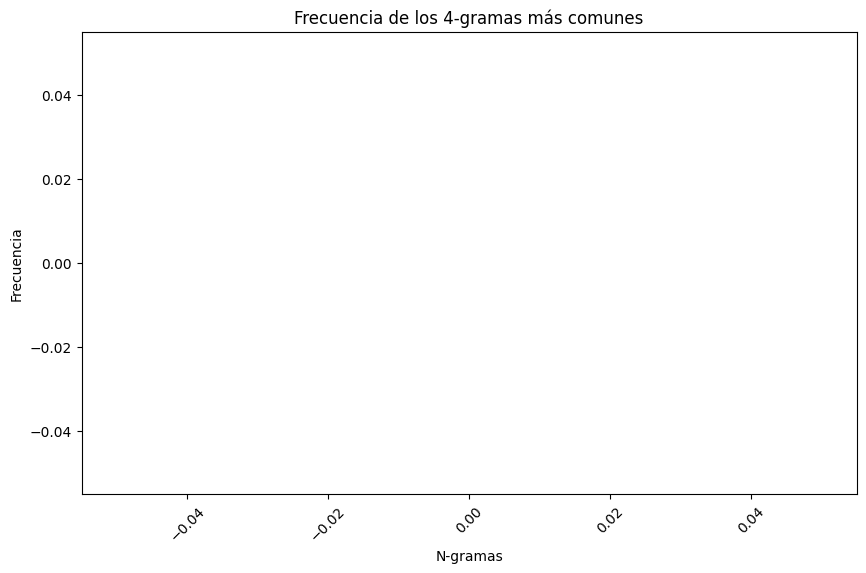

In [23]:
# Generar n-gramas de longitud 4
ngramas_4 = ngrams(tokens, 4)

# Contar la frecuencia de los 4-gramas
freq_ngramas_4 = FreqDist(ngramas_4)

# Convertir las claves de los 4-gramas a cadenas para visualización
ngramas_4_str = [" ".join(ngram) for ngram in freq_ngramas_4.keys()]

# Convertir las frecuencias a lista
frequencies_4 = list(freq_ngramas_4.values())

# Crear un gráfico de barras para los 4-gramas más comunes
plt.figure(figsize=(10, 6))
plt.bar(ngramas_4_str[:10], frequencies_4[:10])  # Usa las frecuencias como lista
plt.xlabel("N-gramas")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de los 4-gramas más comunes")
plt.xticks(rotation=45)
plt.show()
